## Basics of Linear Algebra

### Vectors and Hyper-planes:
- Representation
- Unit vector 
- Angle between 2 vectors
- Distance from point to plane
- Half-spaces


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import math
import numpy as np
Image(url= "plane_pi.jpg", width=700)

# Question: What data-structure can we use to represent a plane?
# Answer: Numpy array would be a good data structure as we do lot of complex 
# matrix and vector operations and numpy is king of that.

In [2]:

w = np.array([1.2,0,1.1,0,1.4,1.5])
b = 1.2

print(type(w))
print(w.size)

pi = (w,b) 
print(pi)

pi_0 = (w,0)
print(pi_0)
#Remember: pi_0 and pi are parallel to each other.
# As if two planes has same normal than those are parallel to each other.


<class 'numpy.ndarray'>
6
(array([1.2, 0. , 1.1, 0. , 1.4, 1.5]), 1.2)
(array([1.2, 0. , 1.1, 0. , 1.4, 1.5]), 0)


In [3]:
# unit vector: w_hat from w
Image(url= "w_hat.jpg", width=700)


In [4]:
# Calculating unit vector: w_hat from w

# Calculating norm of w 
w_norm = math.sqrt(np.dot(w,w)) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
print(w_norm)

# Calculating norm of w using numpy
print(np.linalg.norm(w, 2)) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html

w_hat = w/w_norm

# Unit vector w_hat
print(w_hat)

# lets verify
print(np.linalg.norm(w_hat, 2))

2.619160170741759
2.619160170741759
[0.45816213 0.         0.41998195 0.         0.53452248 0.57270266]
1.0


In [5]:
# Angle between 2 vectors v1 and v2.
Image(url= "angle.jpg", width=400)

In [6]:
# REMEMBER: If nothing has been placed which signifies norm (1, 2, F, etc...)
# It will be L2 norm by default ---> ||V1|| = ||V1||2

# Calculating angle between 2 vectors
np.random.seed(42)

v1 = np.random.rand(10) # a random vector of 10-dim
v2 = np.random.rand(10)

angle_12 = math.acos(np.dot(v1,v2)/(np.linalg.norm(v1, 2) * np.linalg.norm(v2, 2)))
print(angle_12) # in radians


0.43284368425515946


In [7]:
# Distance from point to a plane.
Image(url= "point_to_plane.jpg", width=500)

In [8]:
# Calculating distance from point to a plane
np.random.seed(42) # To ensure we get same random numbers everytime we run it

w = np.random.rand(10)
b = 1.2

x = np.random.rand(10)

d = abs( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(d)

#How would you test if this code is correct?


2.0341445148371355


In [9]:
# simple test-cases

w = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
b = 0

x = np.array([23, 0, 0, 0, 0, 0, 0, 0, 0, 0])

d = abs( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(d)

# We are trying to have 10-Dimensions and plane represented by w is in 1st dimension 
# and so x is. Now the length of point x is far from w is 23.
# Can be scaled to n dimensions

23.0


In [10]:
# +ve or -ve halfspace
Image(url= "point_side.jpg", width=500)

In [11]:
# Check if point is in +ve half-space or -ve half-space or on a plane itself
np.random.seed(42)

w = np.random.rand(10)
b = 1.2

x = np.random.rand(10)

sign =  np.sign( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(sign)
# Diving by norm of w (np.linalg.norm(w,2)) doesn't change sign
# as norm of w will always be +ve. can be removed also.

1.0


In [12]:
# Let's test it...
w = np.random.rand(10)
b = 1.2

x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

sign =  np.sign( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(sign)
# Here we are taking point x as origin. Hence as per the formula
# wTx+b = b if x == 0 which means if b is +ve value, the origin x 
# will be in same direction as plane w is in and if b is -ve value
# the origin will be in opposite side as compared to w

1.0


### Matrices
- Often used to represent data: data matrices
- Basic Operations: Add, Multiply
- Frobenius norm
- Haddarmard product


In [13]:
# Basic opearations 
np.random.seed(42)

n=10
d=4

X1 = np.random.rand(n,d) # n data points of d-dim each
X2 = np.random.rand(n,d) # n data points of d-dim each

w = np.random.rand(d)  # a d-dim vector

print(X1)
print("************************************************************")
print(X2)
print("************************************************************")
print(X1+X2)
print("************************************************************")

print(X1*X2) # hadammard product (or) element wise product
print("************************************************************")

print(np.matmul(X1,X2)) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul
print("************************************************************")


[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412]
 [0.06505159 0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303 0.44015249]]
************************************************************
[[0.12203823 0.49517691 0.03438852 0.9093204 ]
 [0.25877998 0.66252228 0.31171108 0.52006802]
 [0.54671028 0.18485446 0.96958463 0.77513282]
 [0.93949894 0.89482735 0.59789998 0.92187424]
 [0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333]
 [0.28093451 0.54269608 0.14092422 0.80219698]
 [0.07455064 0.98688694 0.77224477 0.19871568]
 [0.00552212 0.81546143 0.70685734 0.72900717]
 [0.77127035 0.07404465 0.35846573 0.11586906

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 4)

In [14]:
print((np.matmul(X1,X2.T)).shape) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul
print("************************************************************")

(10, 10)
************************************************************


In [15]:
# w.X

print(np.dot(w,X1[0,:]))

print(np.matmul(w,X1.T)) # alwasys make sure the dimensions match.

print(np.matmul(X1, w.T))

print(np.matmul(w,X1))

1.1961104012282664
[1.1961104  0.30616379 1.02862198 0.92265708 0.75111202 0.73499403
 0.98178982 0.75214112 1.01849097 0.57817876]
[1.1961104  0.30616379 1.02862198 0.92265708 0.75111202 0.73499403
 0.98178982 0.75214112 1.01849097 0.57817876]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 4)

In [16]:
# Frobenius norm: 
Image(url= "frobenius.jpg", width=300)

In [17]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
print(np.linalg.norm(X1, 'fro'))


# implement using the formula
sh = X1.shape;
print(sh)

sum = 0
for i in range(sh[0]):
  for j in range(sh[1]):
    sum += X1[i,j]**2

print(math.sqrt(sum))


3.4259141477736104
(10, 4)
3.4259141477736104


### Convolution 
- Used in Deep-learning and Computer-Vision a lot
- Image: Matrix of pixel values


In [18]:
# Convolution: Google Image search ---> Apple's developer blog.

Image(url= "https://docs-assets.developer.apple.com/published/09348c5368/a55b1477-4f79-4221-8aa1-ab3ae9f01f89.png", width=400)

<class 'numpy.ndarray'>
(512, 512)


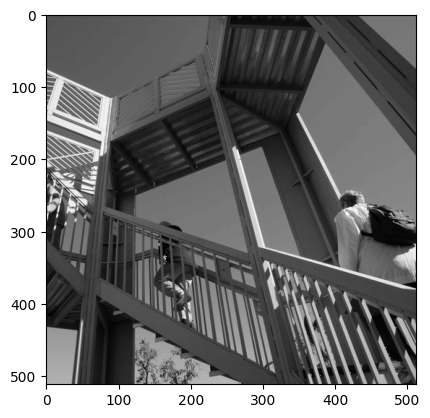

In [19]:
import scipy
from scipy import signal
from scipy import datasets

ascent = datasets.ascent() # inbuilt image in Scipy
print(type(ascent))
print(ascent.shape)

import matplotlib.pyplot as plt
img_plot = plt.imshow(ascent, cmap='gray', vmin=0, vmax=255)



[[0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 

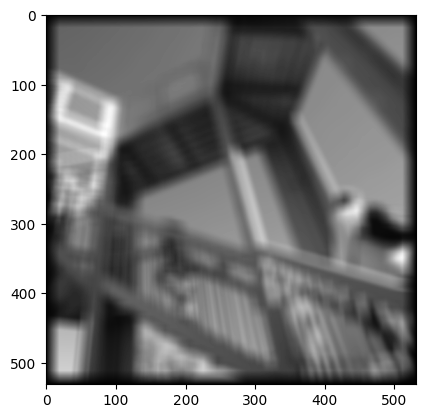

In [20]:
k=20
kernel = np.ones((k,k))
kernel /= np.sum(kernel)

print(kernel)

blurred = signal.convolve2d(ascent, kernel) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

plt.imshow(blurred , cmap='gray')
plt.show()

 **Will revsit these kernels again when we learn basics of Computer Vision and Image processing**
<br>
Further reading: http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/

### Hyper-Sphere
- Simple extension to a Circle to d-dim space
- Representation
- Inside/Outside
- Distance from point to Hyper-Sphere


In [21]:

Image(url= "point_side_circle.jpg", width=500)

In [23]:
# Representation:

np.random.seed(42)

c = np.random.rand(10)
r = 10
print(c)
print(r)

circle = (c,r)




[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
10


In [24]:
#inside/outside

x1 = c + np.zeros(10);

d_x1_c = np.linalg.norm(x1-c)
print(d_x1_c)


x2 = c + r + (np.ones(10)*0.1) ;
d_x2_c = np.linalg.norm(x2-c)
print(d_x2_c)




0.0
31.93900436770063


In [26]:

Image(url= "point_distance_circle.jpg", width=500)

In [27]:
# distance from a point to hyper-sphere
x2 = c + r + (np.ones(10)*0.1) 
d_x2 = np.linalg.norm(x2-c) - r 
print(d_x2)

21.93900436770063
